In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mineralML as mm
import Thermobar as pt


In [2]:
mm.__version__

'0.0.0.5'

In [3]:
pt.__version__

'1.0.49'

## To combine standard with lab average values

In [4]:
sts_lab = pd.read_excel('Standard_Values_Berkeley_072125.xlsx', sheet_name="Lab_Averages_4python")
sts_lab.head()
sts_lab['Standard'].unique()


array(['MAC_Forsterite', 'Mong-Ol', 'MAC_Olivine', 'Berkeley_SanCarlos',
       'Berkeley_SpringWater', 'Berkeley_StJohnsHypersthene',
       'Berkeley_Labradorite', 'VG2_BerkeleyBlock', 'JDFD2_BerkeleyBlock',
       'A99_BerkeleyBlock', 'MAC_KL2-G', 'MAC_ML3B_G', 'MAC_T1-G',
       'MAC_GOR132-G', 'MAC_StHs6_80G', 'MAC_CrDiopside', 'Mac_Diopside',
       'MAC_CrSpinel', 'UCB_Chromite', 'UCB_Orthoclase', 'MAC_Enstatite'],
      dtype=object)

In [5]:
sts_day=pd.read_excel('Kam_MIlines_042825.xlsx', sheet_name="Compiled_Standards")
sts_day.head()
sts_day['Sample_string']=sts_day['Sample Name'].str.split('_').str[0]
sts_day['Sample_string'].unique()

array(['MacFo', 'KL2-G', 'ML3-B', 'MacOl', 'JDFg2', 'VG-2', 'SJhyp',
       'A-99', 'Springwater', 'SanCarlos', 'Jthyp'], dtype=object)

In [6]:

sts_day.loc[sts_day['Sample_string']=='MacFo','Standard_Name']='MAC_Forsterite'
sts_day.loc[sts_day['Sample_string']=='KL2-G','Standard_Name']='MAC_KL2-G'
sts_day.loc[sts_day['Sample_string']=='ML3-B','Standard_Name']='MAC_ML3B_G'
sts_day.loc[sts_day['Sample_string']=='MacOl','Standard_Name']= 'MAC_Olivine'
sts_day.loc[sts_day['Sample_string']=='JDFg2','Standard_Name']='JDFD2_BerkeleyBlock'
sts_day.loc[sts_day['Sample_string']=='VG-2','Standard_Name']='VG2_BerkeleyBlock'
sts_day.loc[sts_day['Sample_string']=='SJhyp','Standard_Name']='Berkeley_StJohnsHypersthene'
sts_day.loc[sts_day['Sample_string']=='A-99','Standard_Name']='A99_BerkeleyBlock'
sts_day.loc[sts_day['Sample_string']=='Springwater','Standard_Name']='Berkeley_SpringWater'
sts_day.loc[sts_day['Sample_string']=='SanCarlos','Standard_Name']='Berkeley_SanCarlos'
sts_day.loc[sts_day['Sample_string']=='Jthyp','Standard_Name']='Berkeley_StJohnsHypersthene'

sts_day

,Sample Name,Livetime(s),Predict_Mineral,Predict_Probability,Total_wt%,Total_Oxide%,Al2O3,CaO,Cr2O3,FeOt,...,#_ions__Na,#_ions__Al,#_ions__P,#_ions__K,#_ions__Ti,#_ions__Cr,#_ions__S,SampleID,Sample_string,Standard_Name
0,MacFo_monday_noon_1,60,Olivine,0.990312,100.1061,100.1061,NaN,0.1142,NaN,8.9364,...,NaN,NaN,NaN,NaN,NaN,NaN,MacFo_monday_noon_1,NaN,MacFo,MAC_Forsterite
1,MacFo_monday_noon_2,60,Olivine,0.990343,100.2818,100.2818,NaN,0.1687,NaN,9.0069,...,NaN,NaN,NaN,NaN,NaN,NaN,MacFo_monday_noon_2,NaN,MacFo,MAC_Forsterite
2,MacFo_monday_noon_3,60,Olivine,0.990064,100.4378,100.4378,NaN,0.1021,NaN,8.9072,...,NaN,NaN,NaN,NaN,NaN,NaN,MacFo_monday_noon_3,NaN,MacFo,MAC_Forsterite
3,MacFo_monday_noon_4,60,Olivine,0.990233,100.0764,100.0764,NaN,0.1073,NaN,8.9671,...,NaN,NaN,NaN,NaN,NaN,NaN,MacFo_monday_noon_4,NaN,MacFo,MAC_Forsterite
4,MacFo_monday_noon_5,60,Olivine,0.990179,100.1268,100.1268,NaN,0.1046,NaN,8.9033,...,NaN,NaN,NaN,NaN,NaN,NaN,MacFo_monday_noon_5,NaN,MacFo,MAC_Forsterite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,SanCarlos_mon_overnight_6s_5,6,Olivine,0.978363,98.7280,98.7280,NaN,0.0745,NaN,9.8057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SanCarlos_mon_overnight_6s_5,SanCarlos,Berkeley_SanCarlos
97,SanCarlos_mon_overnight_6s_6,6,Olivine,0.977175,99.3282,99.3283,NaN,0.1114,NaN,9.8905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SanCarlos_mon_overnight_6s_6,SanCarlos,Berkeley_SanCarlos
98,Jthyp_mon_overnight_6s_4,6,Orthopyroxene,0.974025,99.8973,99.8973,1.0229,1.3400,0.6256,14.9439,...,NaN,0.02,NaN,NaN,0.0,0.01,NaN,Jthyp_mon_overnight_6s_4,Jthyp,Berkeley_StJohnsHypersthene
99,Jthyp_mon_overnight_6s_5,6,Orthopyroxene,0.974187,99.7250,99.7250,0.9654,1.2806,0.6582,15.1394,...,NaN,0.02,NaN,NaN,0.0,0.01,NaN,Jthyp_mon_overnight_6s_5,Jthyp,Berkeley_StJohnsHypersthene


In [7]:
sts_combo=pd.merge(left=sts_day,right=sts_lab,left_on='Standard_Name',right_on='Standard',suffixes=[None,"_lab_mean"])
sts_combo

,Sample Name,Livetime(s),Predict_Mineral,Predict_Probability,Total_wt%,Total_Oxide%,Al2O3,CaO,Cr2O3,FeOt,...,Al2O3_lab_mean,CaO_lab_mean,MnO_lab_mean,P2O5_lab_mean,Na2O_lab_mean,K2O_lab_mean,FeOt_lab_mean,NiO_lab_mean,SO3_lab_mean,Cr2O3_lab_mean
0,MacFo_monday_noon_1,60,Olivine,0.990312,100.1061,100.1061,NaN,0.1142,NaN,8.9364,...,0.0000,0.099772,0.129566,NaN,0.0,0.0,8.859789,0.396020,NaN,0.006747
1,MacFo_monday_noon_2,60,Olivine,0.990343,100.2818,100.2818,NaN,0.1687,NaN,9.0069,...,0.0000,0.099772,0.129566,NaN,0.0,0.0,8.859789,0.396020,NaN,0.006747
2,MacFo_monday_noon_3,60,Olivine,0.990064,100.4378,100.4378,NaN,0.1021,NaN,8.9072,...,0.0000,0.099772,0.129566,NaN,0.0,0.0,8.859789,0.396020,NaN,0.006747
3,MacFo_monday_noon_4,60,Olivine,0.990233,100.0764,100.0764,NaN,0.1073,NaN,8.9671,...,0.0000,0.099772,0.129566,NaN,0.0,0.0,8.859789,0.396020,NaN,0.006747
4,MacFo_monday_noon_5,60,Olivine,0.990179,100.1268,100.1268,NaN,0.1046,NaN,8.9033,...,0.0000,0.099772,0.129566,NaN,0.0,0.0,8.859789,0.396020,NaN,0.006747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,SanCarlos_mon_overnight_6s_2,6,Olivine,0.975225,99.4475,99.4475,NaN,0.0842,NaN,9.6529,...,0.0362,0.098505,0.146985,NaN,0.0,0.0,9.751122,0.376175,NaN,NaN
97,SanCarlos_mon_overnight_6s_2,6,Olivine,0.976794,99.1665,99.1665,NaN,0.1204,NaN,9.7331,...,0.0362,0.098505,0.146985,NaN,0.0,0.0,9.751122,0.376175,NaN,NaN
98,SanCarlos_mon_overnight_6s_4,6,Olivine,0.977152,98.7924,98.7924,NaN,0.1182,NaN,9.8018,...,0.0362,0.098505,0.146985,NaN,0.0,0.0,9.751122,0.376175,NaN,NaN
99,SanCarlos_mon_overnight_6s_5,6,Olivine,0.978363,98.7280,98.7280,NaN,0.0745,NaN,9.8057,...,0.0362,0.098505,0.146985,NaN,0.0,0.0,9.751122,0.376175,NaN,NaN


In [15]:
elements = ['Al2O3',	'CaO',	'Cr2O3',	'FeOt',	'K2O',	'MgO',	'MnO',	'Na2O',	'NiO',	'P2O5',	'SO3',	'SiO2',	'TiO2']

for element in elements:
    sts_combo[f'{element}_recovery (%)'] = sts_combo[element] * 100 / sts_combo[f'{element}_lab_mean']
    sts_combo[f'{element}_error (%)'] = sts_combo[f'Oxide % Sigma_{element}'] * 100 / sts_combo[element]

import os
sts_combo.to_excel("Standards_with_recoveries.xlsx",index=False)
sts_combo


,Sample Name,Livetime(s),Predict_Mineral,Predict_Probability,Total_wt%,Total_Oxide%,Al2O3,CaO,Cr2O3,FeOt,...,NiO_recovery (%),NiO_error (%),P2O5_recovery (%),P2O5_error (%),SO3_recovery (%),SO3_error (%),SiO2_recovery (%),SiO2_error (%),TiO2_recovery (%),TiO2_error (%)
0,MacFo_monday_noon_1,60,Olivine,0.990312,100.1061,100.1061,NaN,0.1142,NaN,8.9364,...,98.075855,5.406797,NaN,NaN,NaN,NaN,100.037825,0.158922,NaN,NaN
1,MacFo_monday_noon_2,60,Olivine,0.990343,100.2818,100.2818,NaN,0.1687,NaN,9.0069,...,95.323469,17.854305,NaN,NaN,NaN,NaN,100.190910,0.503261,NaN,NaN
2,MacFo_monday_noon_3,60,Olivine,0.990064,100.4378,100.4378,NaN,0.1021,NaN,8.9072,...,97.596081,5.433376,NaN,NaN,NaN,NaN,100.556790,0.158591,NaN,NaN
3,MacFo_monday_noon_4,60,Olivine,0.990233,100.0764,100.0764,NaN,0.1073,NaN,8.9671,...,92.015555,5.762898,NaN,NaN,NaN,NaN,100.117931,0.158795,NaN,NaN
4,MacFo_monday_noon_5,60,Olivine,0.990179,100.1268,100.1268,NaN,0.1046,NaN,8.9033,...,102.570577,5.169867,NaN,NaN,NaN,NaN,100.118422,0.159039,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,SanCarlos_mon_overnight_6s_2,6,Olivine,0.975225,99.4475,99.4475,NaN,0.0842,NaN,9.6529,...,101.442148,17.400419,NaN,NaN,NaN,NaN,100.647618,0.499657,NaN,NaN
97,SanCarlos_mon_overnight_6s_2,6,Olivine,0.976794,99.1665,99.1665,NaN,0.1204,NaN,9.7331,...,78.474114,22.459350,NaN,NaN,NaN,NaN,99.825938,0.502780,NaN,NaN
98,SanCarlos_mon_overnight_6s_4,6,Olivine,0.977152,98.7924,98.7924,NaN,0.1182,NaN,9.8018,...,121.672094,14.725803,NaN,NaN,NaN,NaN,99.172547,0.504597,NaN,NaN
99,SanCarlos_mon_overnight_6s_5,6,Olivine,0.978363,98.7280,98.7280,NaN,0.0745,NaN,9.8057,...,98.385060,17.995136,NaN,NaN,NaN,NaN,98.737365,0.508323,NaN,NaN


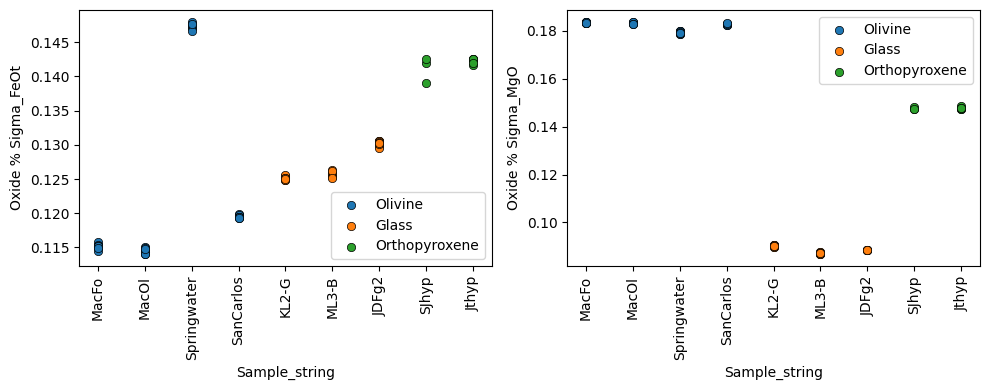

In [9]:
import matplotlib.pyplot as plt
import math


data=sts_combo.copy()

col = 'Predict_Mineral'
x_col = 'Sample_string'
y_col_ax0 = 'Oxide % Sigma_MgO'
y_col_ax1 = 'FeOt_recovery (%)'

colors = plt.cm.tab10.colors
mineral_list = list(data[col].unique())
color_map = {mineral: colors[i % len(colors)] for i, mineral in enumerate(mineral_list)}

elements = ['FeOt','MgO']

std_num = len(elements)
cols = 2
rows = math.ceil(std_num / cols)

fig, ax = plt.subplots(rows, cols, figsize=(5*cols, 4 * rows))
ax = ax.flatten()

for i, element in enumerate(elements):
    y_col_i = f'{element}_recovery (%)'
    y_col_i = f'Oxide % Sigma_{element}'

    for mineral in mineral_list:
        mask = data[col] == mineral
        valid_data = ~data[y_col_i].isna() & ~data[x_col].isna()  # Remove NaN values
        livetime=data['Livetime(s)']==6

        ax[i].scatter(
            data[x_col][mask & valid_data & livetime], 
            data[y_col_i][mask & valid_data & livetime],
            label=mineral, edgecolor='k', linewidths=0.5, color=color_map[mineral]
        )
        ax[i].set_xlabel(x_col)
        ax[i].set_ylabel(y_col_i)
        ax[i].tick_params(axis='x', rotation=90)
        ax[i].legend()

plt.tight_layout()
plt.show()


In [10]:
mean_glass_error_MgO=np.mean(sts_combo['Oxide % Sigma_MgO'][sts_combo['Sample_string'].str.contains('KL2-G|JDFg2|ML3-B')])
std_glass_error_MgO=np.std(sts_combo['Oxide % Sigma_MgO'][sts_combo['Sample_string'].str.contains('KL2-G|JDFg2|ML3-B')])
mean_glass_error_FeOt=np.mean(sts_combo['Oxide % Sigma_FeOt'][sts_combo['Sample_string'].str.contains('KL2-G|JDFg2|ML3-B')])
std_glass_error_FeOt=np.std(sts_combo['Oxide % Sigma_FeOt'][sts_combo['Sample_string'].str.contains('KL2-G|JDFg2|ML3-B')])
print(f'MgO_meanerror = {mean_glass_error_MgO} +- {std_glass_error_MgO}')
print(f'FeOt_meanerror = {mean_glass_error_FeOt} +- {std_glass_error_FeOt}')

print(mean_glass_error_FeOt+std_glass_error_FeOt*2)
print(mean_glass_error_MgO+std_glass_error_MgO*2)

MgO_meanerror = 0.07350277777777778 +- 0.026152973976959218
FeOt_meanerror = 0.10540277777777779 +- 0.03756992359521932
0.18054262496821644
0.1258087257316962


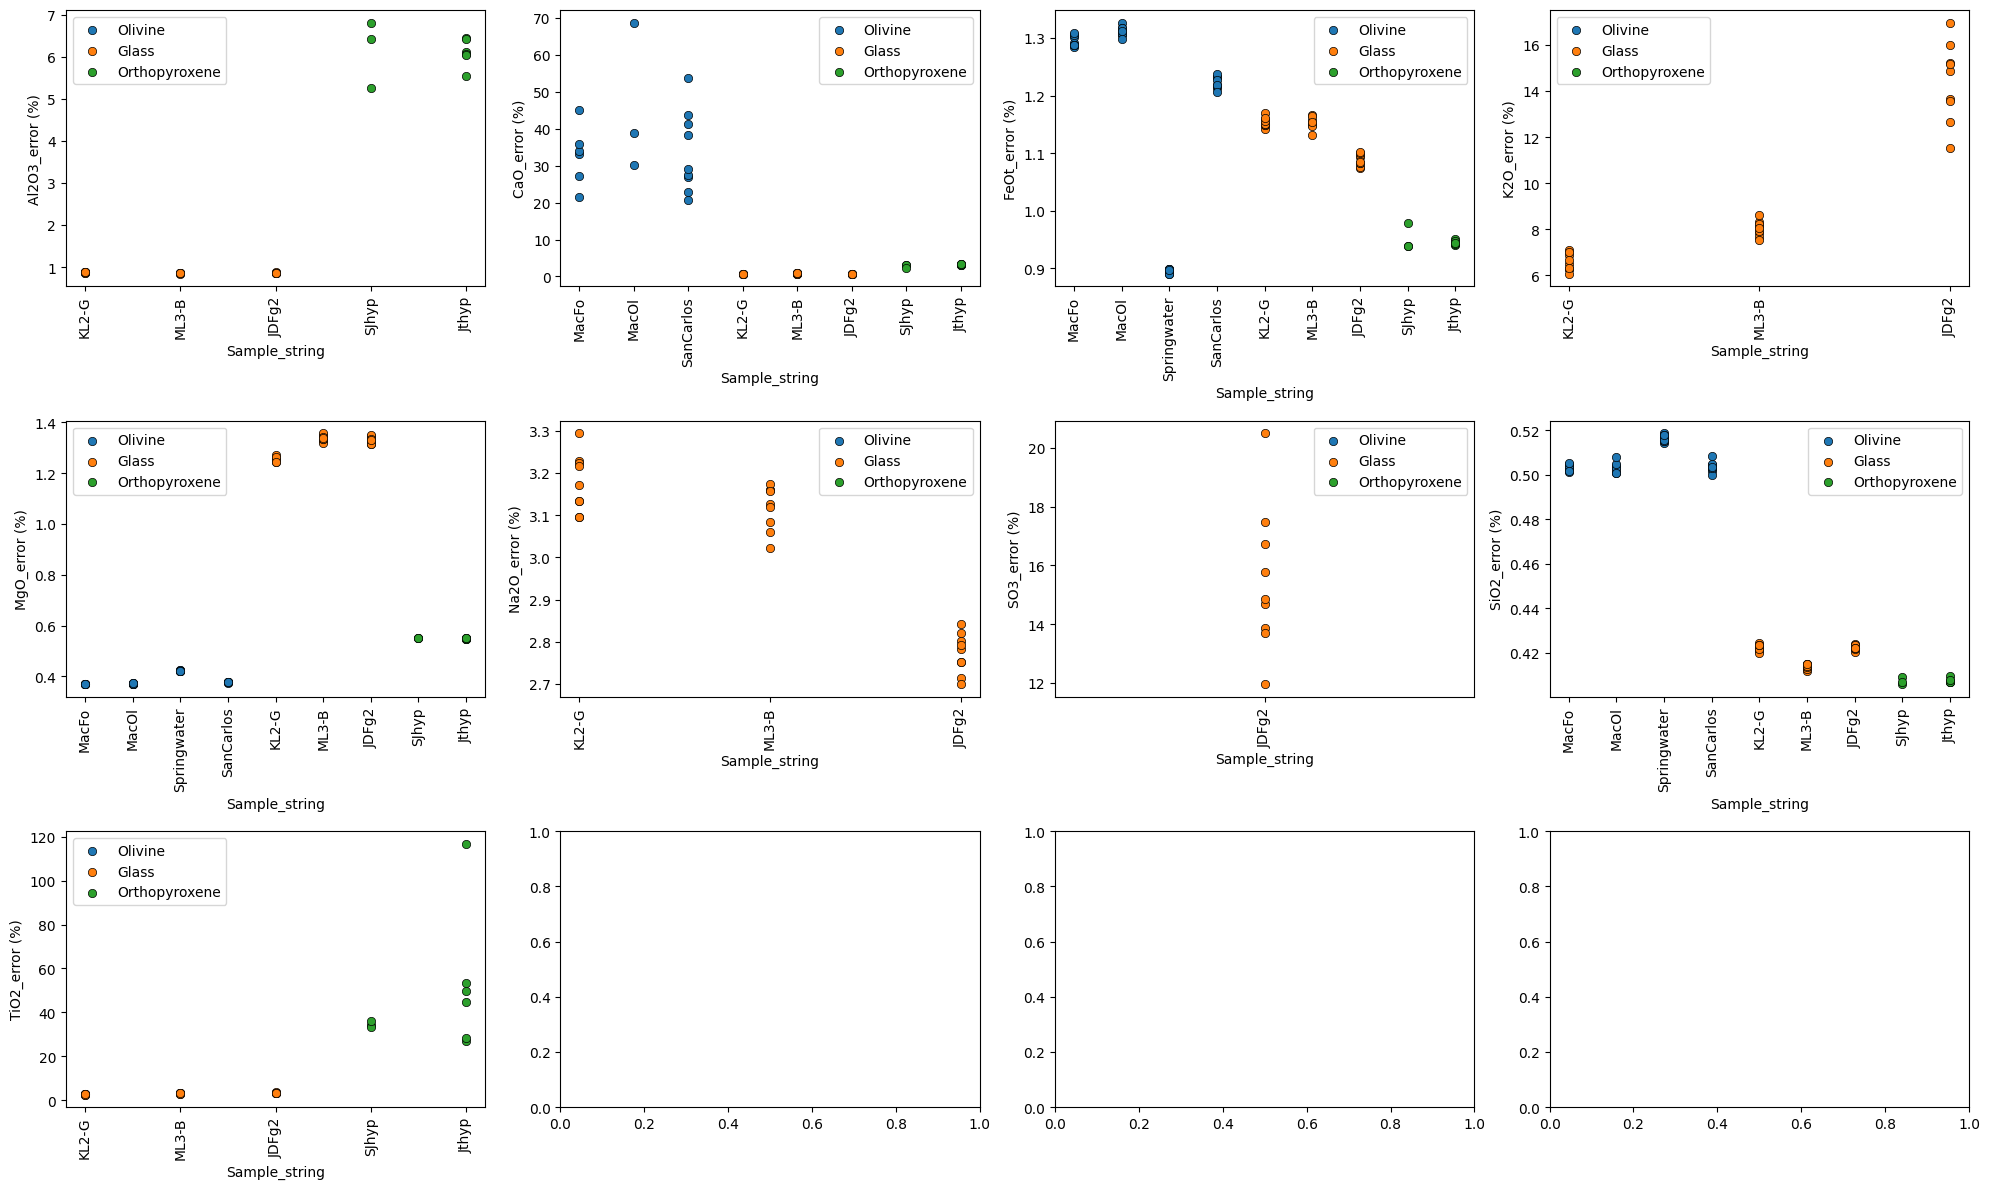

In [89]:
import matplotlib.pyplot as plt
import math


data=sts_combo.copy()

col = 'Predict_Mineral'
x_col = 'Sample_string'
y_col_ax0 = 'Oxide % Sigma_MgO'
y_col_ax1 = 'FeOt_recovery (%)'

colors = plt.cm.tab10.colors
mineral_list = list(data[col].unique())
color_map = {mineral: colors[i % len(colors)] for i, mineral in enumerate(mineral_list)}

elements =['Al2O3','CaO','FeOt','K2O','MgO','Na2O','SO3','SiO2','TiO2']
std_num = len(elements)
cols = 4
rows = math.ceil(std_num / cols)

fig, ax = plt.subplots(rows, cols, figsize=(5*cols, 4 * rows))
ax = ax.flatten()

for i, element in enumerate(elements):
    y_col_i = f'{element}_recovery (%)'
    y_col_i = f'{element}_error (%)'

    for mineral in mineral_list:
        mask = data[col] == mineral
        valid_data = ~data[y_col_i].isna() & ~data[x_col].isna()  # Remove NaN values
        livetime=data['Livetime(s)']==6

        ax[i].scatter(
            data[x_col][mask & valid_data & livetime], 
            data[y_col_i][mask & valid_data & livetime],
            label=mineral, edgecolor='k', linewidths=0.5, color=color_map[mineral]
        )
        ax[i].set_xlabel(x_col)
        ax[i].set_ylabel(y_col_i)
        ax[i].tick_params(axis='x', rotation=90)
        ax[i].legend()

plt.tight_layout()
plt.show()


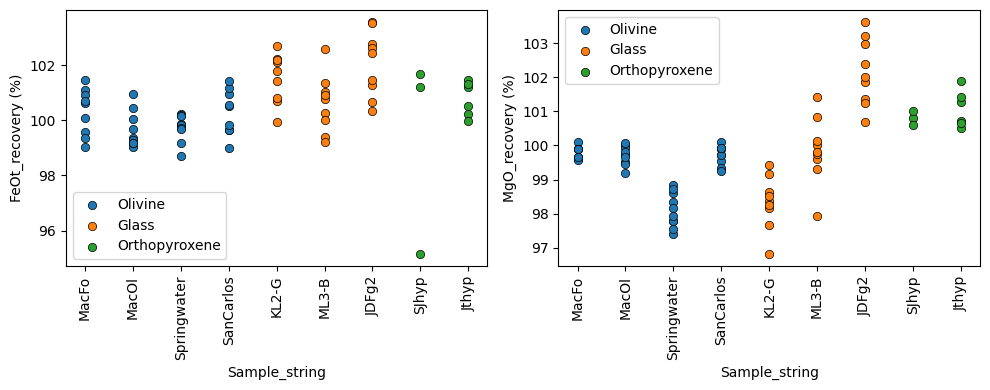

In [ ]:
import matplotlib.pyplot as plt
import math


data=sts_combo.copy()

col = 'Predict_Mineral'
x_col = 'Sample_string'
y_col_ax0 = 'MgO_recovery (%)'
y_col_ax1 = 'FeOt_recovery (%)'

colors = plt.cm.tab10.colors
mineral_list = list(data[col].unique())
color_map = {mineral: colors[i % len(colors)] for i, mineral in enumerate(mineral_list)}

elements = ['FeOt','MgO']

std_num = len(elements)
cols = 2
rows = math.ceil(std_num / cols)

fig, ax = plt.subplots(rows, cols, figsize=(5*cols, 4 * rows))
ax = ax.flatten()

for i, element in enumerate(elements):
    y_col_i = f'{element}_recovery (%)'

    for mineral in mineral_list:
        mask = data[col] == mineral
        valid_data = ~data[y_col_i].isna() & ~data[x_col].isna()  # Remove NaN values
        livetime=data['Livetime(s)']==6

        ax[i].scatter(
            data[x_col][mask & valid_data & livetime], 
            data[y_col_i][mask & valid_data & livetime],
            label=mineral, edgecolor='k', linewidths=0.5, color=color_map[mineral]
        )
        ax[i].set_xlabel(x_col)
        ax[i].set_ylabel(y_col_i)
        ax[i].tick_params(axis='x', rotation=90)
        ax[i].legend()

plt.tight_layout()
plt.show()


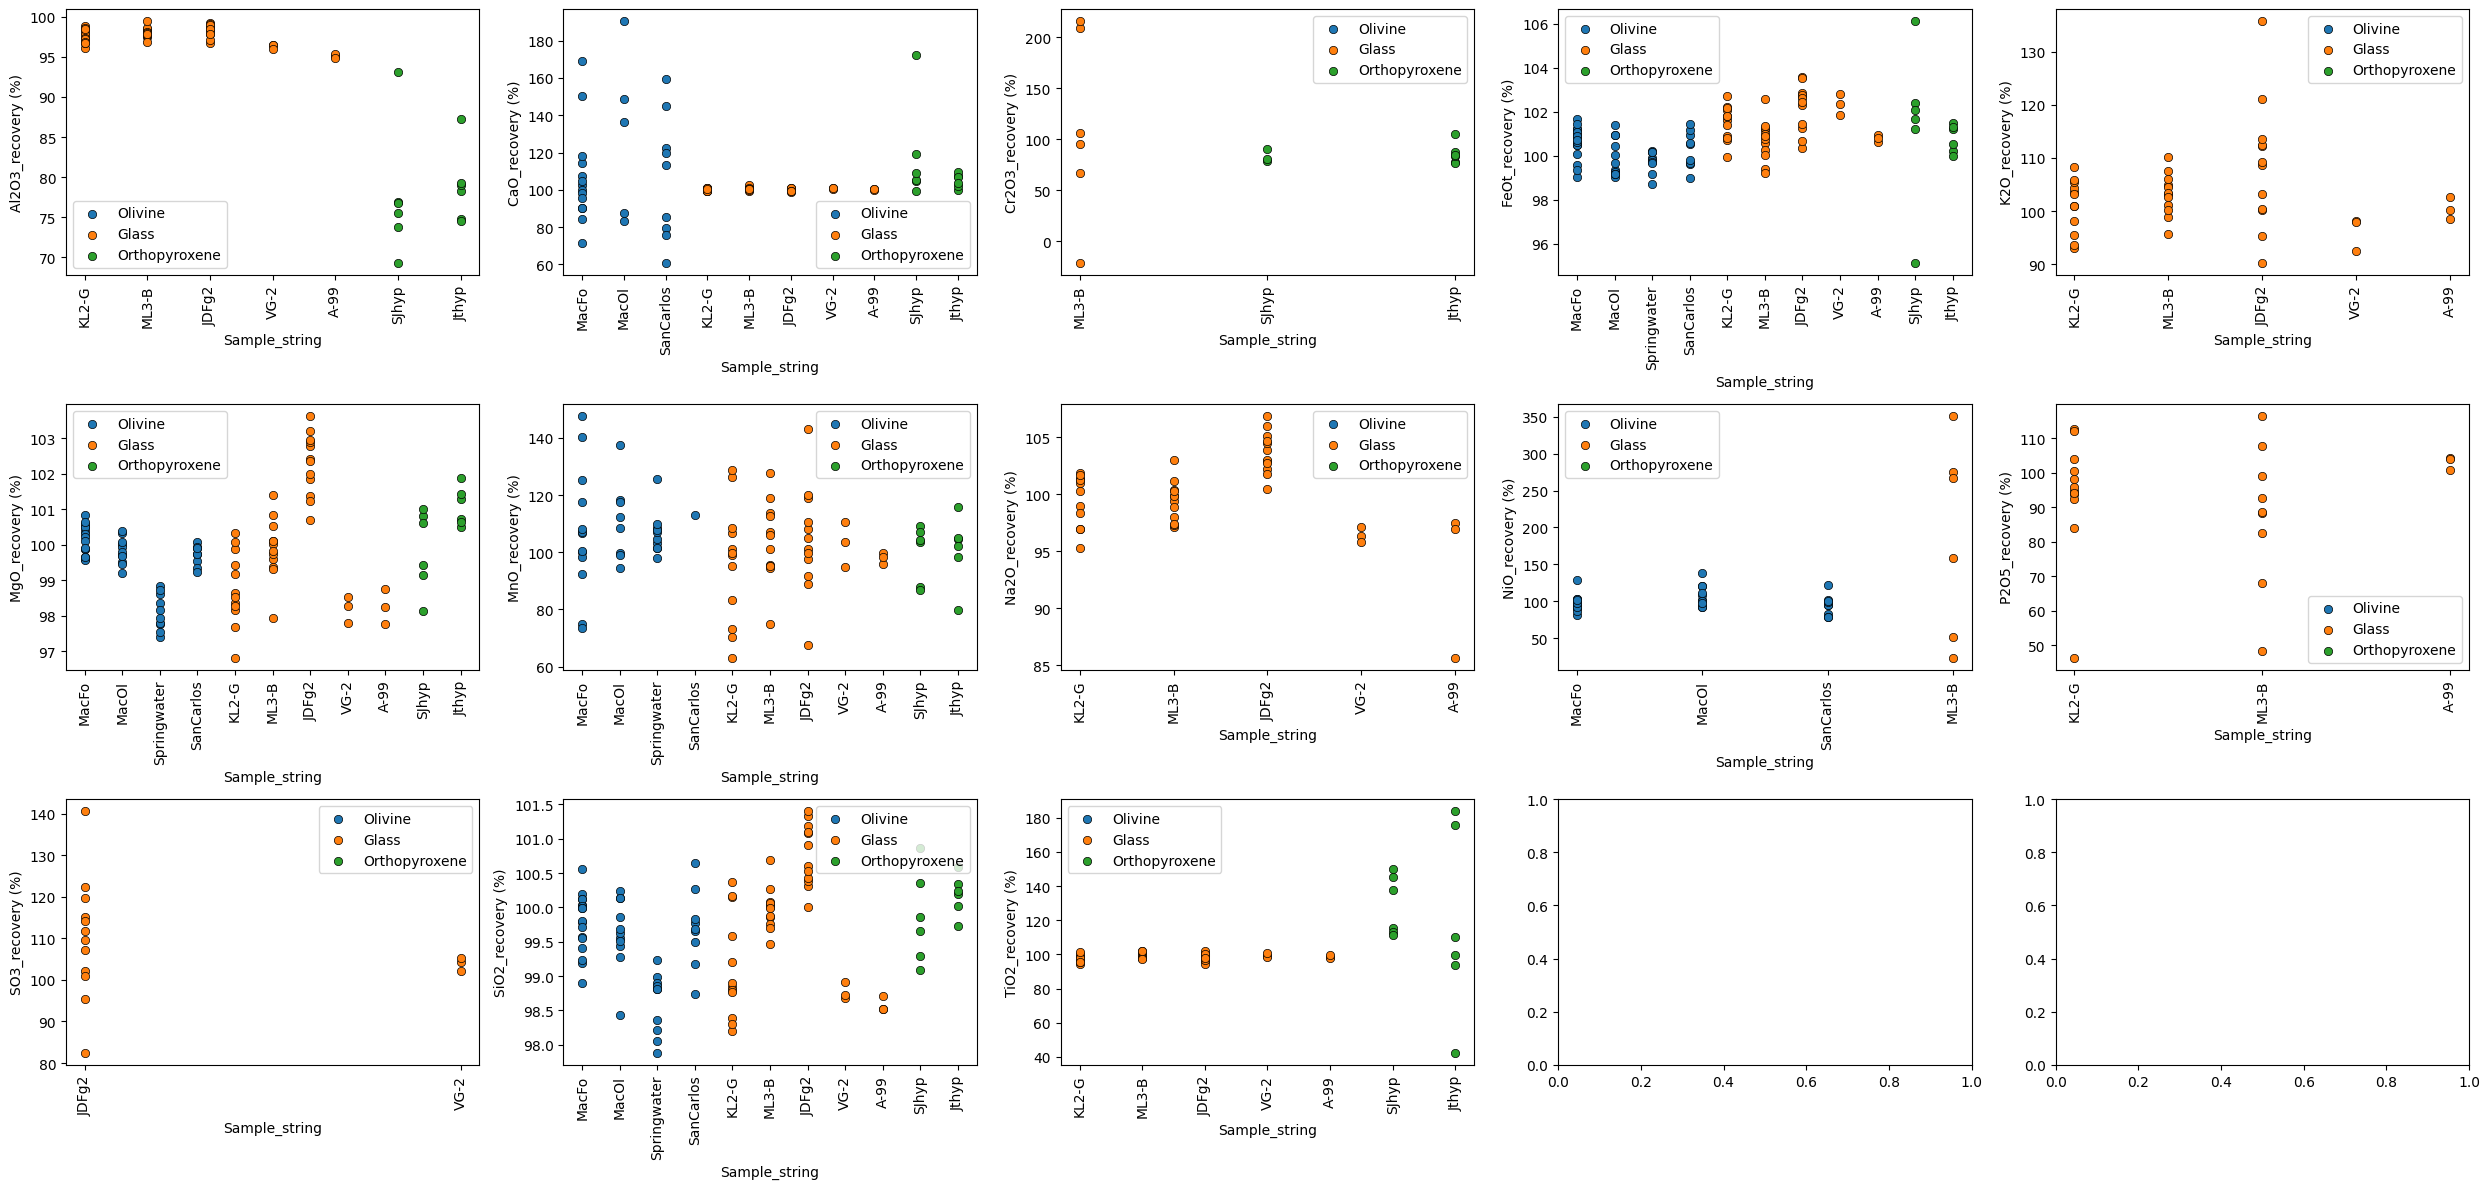

In [77]:
import matplotlib.pyplot as plt
import math


data=sts_combo.copy()

col = 'Predict_Mineral'
x_col = 'Sample_string'
y_col_ax0 = 'MgO_recovery (%)'
y_col_ax1 = 'FeOt_recovery (%)'

colors = plt.cm.tab10.colors
mineral_list = list(data[col].unique())
color_map = {mineral: colors[i % len(colors)] for i, mineral in enumerate(mineral_list)}

elements = ['Al2O3','CaO','Cr2O3','FeOt','K2O','MgO','MnO','Na2O','NiO','P2O5','SO3','SiO2','TiO2']

std_num = len(elements)
cols = 5
rows = math.ceil(std_num / cols)

fig, ax = plt.subplots(rows, cols, figsize=(5*cols, 4 * rows))
ax = ax.flatten()

for i, element in enumerate(elements):
    y_col_i = f'{element}_recovery (%)'

    for mineral in mineral_list:
        mask = data[col] == mineral
        valid_data = ~data[y_col_i].isna() & ~data[x_col].isna()  # Remove NaN values
       
        # Apply the mask to filter out invalid data
        ax[i].scatter(
            data[x_col][mask & valid_data], 
            data[y_col_i][mask & valid_data],
            label=mineral, edgecolor='k', linewidths=0.5, color=color_map[mineral]
        )
        ax[i].set_xlabel(x_col)
        ax[i].set_ylabel(y_col_i)
        ax[i].tick_params(axis='x', rotation=90)
        ax[i].legend()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import math


data=sts_combo.copy()

col = 'Predict_Mineral'
x_col = 'Standard_Name'
y_col_ax0 = 'MgO_recovery (%)'
y_col_ax1 = 'FeOt_recovery (%)'

colors = plt.cm.tab10.colors
mineral_list = list(data[col].unique())
color_map = {mineral: colors[i % len(colors)] for i, mineral in enumerate(mineral_list)}

std_num = len(mineral_list)
cols = 1
rows = math.ceil(std_num / cols)

fig, ax = plt.subplots(rows, cols, figsize=(7, 3 * rows))
ax = ax.flatten()

for i, mineral in enumerate(mineral_list):
    mask = data[col]==mineral

    ax[i].scatter(data[x_col][mask], data[y_col_ax0][mask],
                  label=mineral, edgecolor='k', linewidths=0.5, color=color_map[mineral])
    
    ax[i].set_title(f'{mineral} - {y_col_ax0}')
    ax[i].set_xlabel(x_col)
    ax[i].set_ylabel(y_col_ax0)

    # Optionally add a legend
    ax[i].legend()

    # # Second subplot (FeOt recovery)
    # if i + std_num // 2 < len(ax):  # To avoid index out of range in case std_num is odd
    #     ax[i + std_num // 2].scatter(data[x_col][mask_low_conf], data[y_col_ax1][mask_low_conf],
    #                                   label=mineral, edgecolor='k', linewidths=0.5, color=color_map[mineral])
    #     ax[i + std_num // 2].scatter(data[x_col][mask_high_conf], data[y_col_ax1][mask_high_conf],
    #                                   marker='*', s=90, edgecolor='k', linewidths=0.5, color=color_map[mineral])
    #     ax[i + std_num // 2].set_title(f'{mineral} - {y_col_ax1}')
    #     ax[i + std_num // 2].set_xlabel(x_col)
    #     ax[i + std_num // 2].set_ylabel(y_col_ax1)
    #     ax[i + std_num // 2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

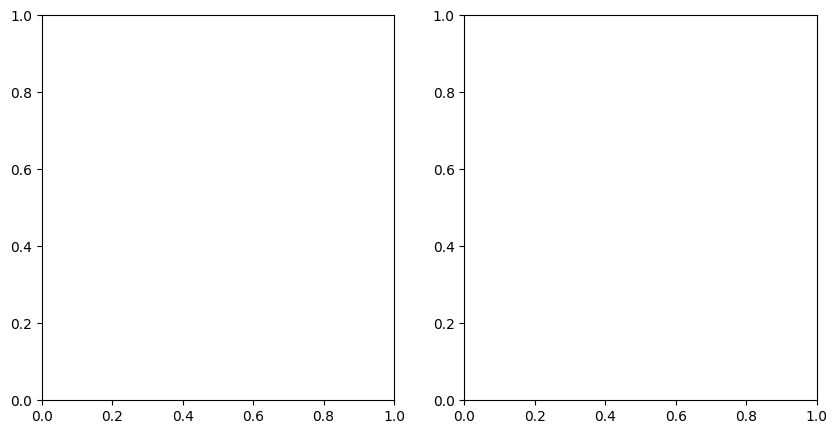

In [ ]:

data=sts_combo.copy()

col = 'Standard_Name'

x_col='Predict_Mineral'
y_col_ax0='MgO_recovery (%)'
y_col_ax1='FeOt_recovery (%)'

colors = plt.cm.tab10.colors
mineral_list = list(data[col].unique())
color_map = {mineral: colors[i % len(colors)] for i, mineral in enumerate(mineral_list)}
std_num=len(data[col].unique())

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for mineral in mineral_list:

    mask_low_conf = (data[col] == mineral) 
    mask_high_conf = (data[col] == mineral)
    
    ax[0,0].scatter(data[x_col][mask_low_conf], data[y_col_ax0][mask_low_conf],
                label=mineral, edgecolor='k', linewidths=0.5, color=color_map[mineral])
    ax[0,0].scatter(data[x_col][mask_high_conf], data[y_col_ax0][mask_high_conf],
                marker='*', s=90, edgecolor='k', linewidths=0.5, color=color_map[mineral])

    ax[1,0].scatter(data[x_col][mask_low_conf], data[y_col_ax1][mask_low_conf],
                label=mineral, edgecolor='k', linewidths=0.5,color=color_map[mineral])
    ax[1,0].scatter(data[x_col][mask_high_conf], data[y_col_ax1][mask_high_conf],
                marker='*', s=90, edgecolor='k', linewidths=0.5,color=color_map[mineral])

## Extract standards and paste into this sheet -
 https://docs.google.com/spreadsheets/d/1V6m2yhYWO6vrLcbZ-0ccXu5zADcnHxmloiOhQwrKl8U/edit?usp=sharing

In [9]:
# Put your name and analysis date here - if it spans multiple days in a single sesion, dont worry, the first day is fine, your standards should be named mon_morn, mon_afternoon etc. anyway.
PersonName='Charlotte'
AnalysisDate='04/28/2025'

## For each standard, write the Name, and also the string in your name 'e.g. if your san carlos are called SC, you would put StdString 'SC'
- Copy and paste these cells for as many standards as you have - p.s. right now, only works for silicates, I need to format for Other oxides.

In [10]:
df_final['SampleID'].unique()

array(['MacFo_mon_eve_6s_9', 'MacFo_mon_eve_6s_10', 'MacFo_mon_eve_6s_11',
       'MacOl_mon_eve_6s_3', 'MacOl_mon_eve_6s_4', 'MacOl_mon_eve_6s_5',
       'KL2-G_mon_eve_6s_4', 'KL2-G_mon_eve_6s_5', 'KL2-G_mon_eve_6s_6',
       'ML3-B_mon_eve_6s_4', 'ML3-B_mon_eve_6s_5', 'ML3-B_mon_eve_6s_6',
       'JDFg2_mon_eve_6s_4', 'JDFg2_mon_eve_6s_5', 'JDFg2_mon_eve_6s_6',
       'Springwater_mon_eve_6s_1', 'Springwater_mon_eve_6s_2',
       'Springwater_mon_eve_6s_3', 'Springwater_mon_eve_6s_4',
       'SanCarlos_mon_eve_6s_1', 'SanCarlos_mon_eve_6s_2',
       'SanCarlos_mon_eve_6s_3', 'SJhyp_mon_eve_6s_4',
       'SJhyp_mon_eve_6s_5', 'SJhyp_mon_eve_6s_6',
       'MacFo_mon_overnight_6s_1', 'MacFo_mon_overnight_6s_2',
       'MacFo_mon_overnight_6s_3', 'MacOl_mon_overnight_6s_1',
       'MacOl_mon_overnight_6s_2', 'MacOl_mon_overnight_6s_3',
       'KL2-G_mon_overnight_6s_1', 'KL2-G_mon_overnight_6s_2',
       'KL2-G_mon_overnight_6s_3', 'ML3-B_mon_overnight_6s_1',
       'ML3-B_mon_overnight

In [ ]:
StdName='MacFo'
StdString='forsterite'
Mac_Fo=pt.extract_silicate_standard_data(df_final, PersonName, StdName, AnalysisDate, StdString)
Mac_Fo.to_clipboard(excel=True)

,AnalysisDate,PersonName,SampleID,Total_Oxide%,MgO,SiO2,TiO2,Al2O3,CaO,MnO,...,Standard Name_K,Standardization Date_K,Standard Name_Fe,Standardization Date_Fe,Standard Name_Ni,Standardization Date_Ni,Standard Name_S,Standardization Date_S,Standard Name_Cr,Standardization Date_Cr


In [ ]:
StdName='JDFD-2'
StdString='JDFD-2'
Mac_Fo=pt.extract_silicate_standard_data(df_final, PersonName, StdName, AnalysisDate, StdString)
Mac_Fo.to_clipboard(excel=True)

,AnalysisDate,PersonName,SampleID,Total_Oxide%,MgO,SiO2,TiO2,Al2O3,CaO,MnO,...,Standard Name_K,Standardization Date_K,Standard Name_Fe,Standardization Date_Fe,Standard Name_Ni,Standardization Date_Ni,Standard Name_S,Standardization Date_S,Standard Name_Cr,Standardization Date_Cr


In [ ]:
StdName='For'
StdString='Fo'
Mac_Fo=pt.extract_silicate_standard_data(df_final, PersonName, StdName, AnalysisDate, StdString)
Mac_Fo.to_clipboard(excel=True)

## Compare EDS and WDS

C:\Users\penny\AppData\Local\Temp\ipykernel_22624\2046057349.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ele_WDS['simplename'] = df_Ele_WDS['Sample Name'].astype(str).str.replace('_WDS', '', regex=False)
C:\Users\penny\AppData\Local\Temp\ipykernel_22624\2046057349.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ele_EDS['simplename']=df_Ele_EDS['Sample Name']


Text(0, 0.5, 'EDS Cr2O3 (wt%)')

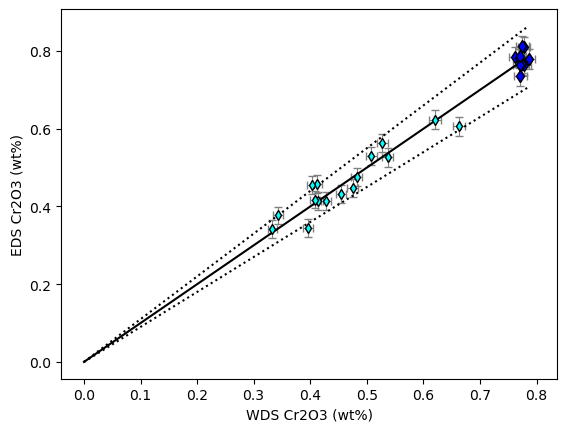

In [ ]:

ele='Cr'
oxide='Cr2O3'
std_str='Hyp'

df = df_final
df_Ele_WDS = df.loc[df[f'Signal Type_{ele}'] == 'WDS']
df_Ele_EDS = df.loc[df[f'Signal Type_{ele}'] == 'EDS']

df_Ele_WDS['simplename'] = df_Ele_WDS['Sample Name'].astype(str).str.replace('_WDS', '', regex=False)
df_Ele_EDS['simplename']=df_Ele_EDS['Sample Name']

df_combined_WDS_EDS = pd.merge(df_Ele_WDS, df_Ele_EDS, on='simplename', how='left')

## Now make a plot
# Plot the main points
plt.plot(df_combined_WDS_EDS[f'{oxide}_x'], df_combined_WDS_EDS[f'{oxide}_y'], '.r')

# Plot the error bars
plt.errorbar(df_combined_WDS_EDS[f'{oxide}_x'], df_combined_WDS_EDS[f'{oxide}_y'],
             xerr=df_combined_WDS_EDS[f'Oxide % Sigma_{oxide}_x'],
             yerr=df_combined_WDS_EDS[f'Oxide % Sigma_{oxide}_y'],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=3)

# Add the standards
plt.plot(df_combined_WDS_EDS[f'{oxide}_x'].loc[df_combined_WDS_EDS['Sample Name_x'].str.contains(std_str)],
          df_combined_WDS_EDS[f'{oxide}_y'].loc[df_combined_WDS_EDS['Sample Name_x'].str.contains(std_str)],
          'dk', mfc='b', zorder=100)

# Plot the reference lines
max=np.max(df_combined_WDS_EDS[f'{oxide}_x'])
min=np.min(df_combined_WDS_EDS[f'{oxide}_x'])
plt.plot([0, max], [0, max], '-k')
plt.plot([0, max], [0, max* 1.1], ':k')
plt.plot([0, max], [0, max * 0.9], ':k')

# Set the labels dynamically
plt.xlabel(f'WDS {oxide} (wt%)')
plt.ylabel(f'EDS {oxide} (wt%)')

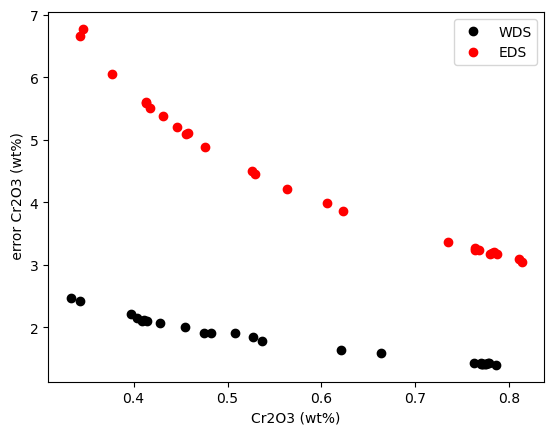

In [ ]:
oxide='Cr2O3'
plt.plot(df_combined_WDS_EDS[f'{oxide}_x'],100*df_combined_WDS_EDS[f'Oxide % Sigma_{oxide}_x']/df_combined_WDS_EDS[f'{oxide}_x'], 'ok', label='WDS')
plt.plot(df_combined_WDS_EDS[f'{oxide}_y'],100*df_combined_WDS_EDS[f'Oxide % Sigma_{oxide}_y']/df_combined_WDS_EDS[f'{oxide}_y'], 'or', label='EDS')

plt.xlabel('Concentration ')

plt.xlabel(f'{oxide} (wt%)')
plt.ylabel(f' error {oxide} (wt%)')
plt.legend()

C:\Users\penny\AppData\Local\Temp\ipykernel_22624\2913304119.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ele_WDS['simplename'] = df_Ele_WDS['Sample Name'].astype(str).str.replace('_WDS', '', regex=False)
C:\Users\penny\AppData\Local\Temp\ipykernel_22624\2913304119.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ele_EDS['simplename']=df_Ele_EDS['Sample Name']


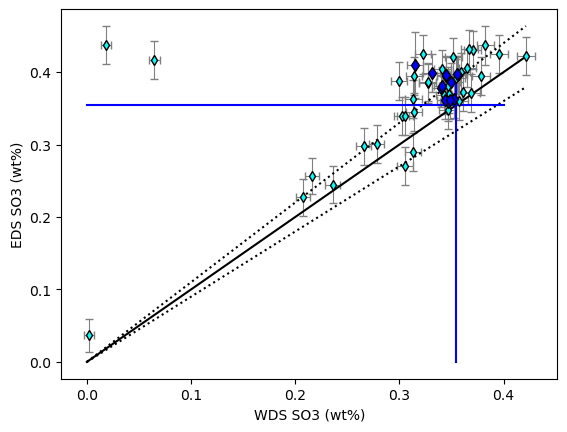

In [ ]:

ele='S'
oxide='SO3'

std_str='JDF'

df = df_final
df_Ele_WDS = df.loc[df[f'Signal Type_{ele}'] == 'WDS']
df_Ele_EDS = df.loc[df[f'Signal Type_{ele}'] == 'EDS']

df_Ele_WDS['simplename'] = df_Ele_WDS['Sample Name'].astype(str).str.replace('_WDS', '', regex=False)
df_Ele_EDS['simplename']=df_Ele_EDS['Sample Name']

df_combined_WDS_EDS = pd.merge(df_Ele_WDS, df_Ele_EDS, on='simplename', how='left')

## Now make a plot
# Plot the main points
plt.plot(df_combined_WDS_EDS[f'{oxide}_x'], df_combined_WDS_EDS[f'{oxide}_y'], '.r')

# Plot the error bars
plt.errorbar(df_combined_WDS_EDS[f'{oxide}_x'], df_combined_WDS_EDS[f'{oxide}_y'],
             xerr=df_combined_WDS_EDS[f'Oxide % Sigma_{oxide}_x'],
             yerr=df_combined_WDS_EDS[f'Oxide % Sigma_{oxide}_y'],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=3)

# Add the standards
plt.plot(df_combined_WDS_EDS[f'{oxide}_x'].loc[df_combined_WDS_EDS['Sample Name_x'].str.contains(std_str)],
          df_combined_WDS_EDS[f'{oxide}_y'].loc[df_combined_WDS_EDS['Sample Name_x'].str.contains(std_str)],
          'dk', mfc='b', zorder=100)

# Plot the reference lines
max=np.max(df_combined_WDS_EDS[f'{oxide}_x'])
min=np.min(df_combined_WDS_EDS[f'{oxide}_x'])
plt.plot([0, max], [0, max], '-k')
plt.plot([0, max], [0, max* 1.1], ':k')
plt.plot([0, max], [0, max * 0.9], ':k')

# Set the labels dynamically
plt.xlabel(f'WDS {oxide} (wt%)')
plt.ylabel(f'EDS {oxide} (wt%)')

plt.plot([0.354, 0.354], [0, 0.4], '-b')
plt.plot([0, 0.4],[0.354, 0.354],  '-b')

In [ ]:
oxide='SO3'
df_test=df_combined_WDS_EDS.loc[(df_combined_WDS_EDS[f'{oxide}_x'].between(0.0, 0.15)) & (df_combined_WDS_EDS[f'{oxide}_y']>0.3)]
df_test

,Sample Name_x,Predict_Mineral_x,Predict_Probability_x,Total_wt%_x,Total_Oxide%_x,Al2O3_x,CaO_x,Cr2O3_x,Cu_x,FeOt_x,...,#_ions__Fe_y,#_ions__Ni_y,#_ions__Mo_y,#_ions__P_y,#_ions__Cr_y,#_ions__Cu_y,SampleID_y,PersonName_y,StdName_y,AnalysisDate_y
8,M49_201_MIA_WDS,Amphibole,0.901405,98.6465,98.6465,14.3339,10.6700,NaN,NaN,10.9775,...,0.45,NaN,NaN,0.01,NaN,NaN,M49_201_MIA,Charlotte,JDFD-2,10/3/2024
39,M58_214_MIA,Amphibole,0.880791,99.6694,99.6694,15.0571,11.9722,NaN,NaN,9.2040,...,0.37,NaN,NaN,0.01,NaN,NaN,M58_214_MIA,Charlotte,JDFD-2,10/3/2024


In [ ]:
df_test['Sample Name_x']

8     M49_201_MIA_WDS
39        M58_214_MIA
Name: Sample Name_x, dtype: object

In [ ]:
df_test['Sample Name_y']

8     M49_201_MIA
39    M58_214_MIA
Name: Sample Name_y, dtype: object

In [ ]:
df_test['SO3_x']

8     0.0186
39    0.0649
Name: SO3_x, dtype: float64

In [ ]:
df_test['SO3_y']

8     0.4372
39    0.4172
Name: SO3_y, dtype: float64

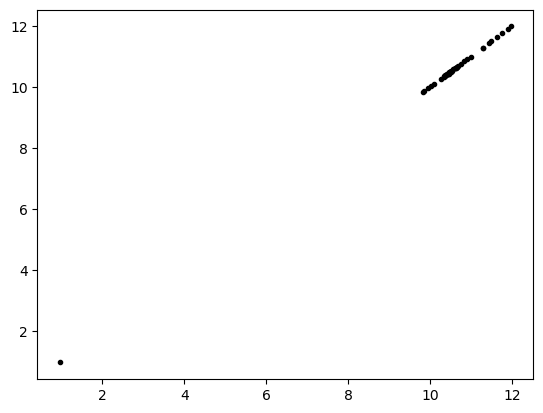

In [ ]:
plt.plot(df_combined_WDS_EDS['CaO_x'], df_combined_WDS_EDS['CaO_y'], '.k')

In [ ]:
df_test['SO3_x']

In [ ]:
df_test['Sample Name_y']

8     M49_201_MIA
39    M58_214_MIA
Name: Sample Name_y, dtype: object

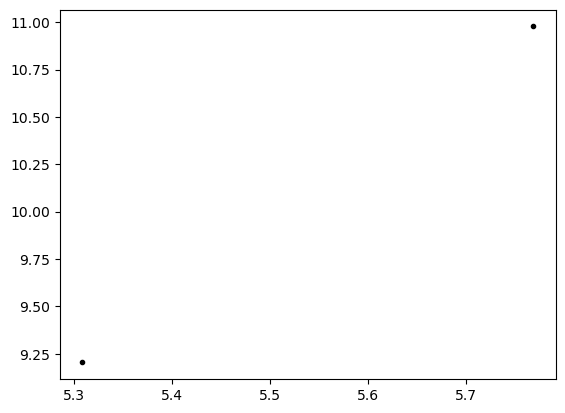

In [ ]:
plt.plot(df_test['MgO_x'], df_test['FeOt_x'], '.k')

(0.0, 50.0)

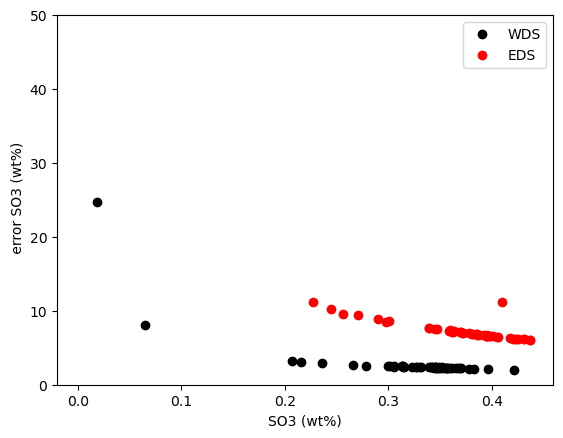

In [ ]:
oxide='SO3'
plt.plot(df_combined_WDS_EDS[f'{oxide}_x'],100*df_combined_WDS_EDS[f'Oxide % Sigma_{oxide}_x']/df_combined_WDS_EDS[f'{oxide}_x'], 'ok', label='WDS')
plt.plot(df_combined_WDS_EDS[f'{oxide}_y'],100*df_combined_WDS_EDS[f'Oxide % Sigma_{oxide}_y']/df_combined_WDS_EDS[f'{oxide}_y'], 'or', label='EDS')

plt.xlabel('Concentration ')

plt.xlabel(f'{oxide} (wt%)')
plt.ylabel(f' error {oxide} (wt%)')
plt.legend()
plt.ylim([0, 50])